In [15]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

dataset = pd.read_csv('Chapter9_NPV Data Set.csv')
x = dataset.iloc[:,0:6]
y = dataset.iloc[:,6].values
print(dataset.describe())

seed = 15
np.random.seed(seed)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size = 0.2)

        Porosity  Permeability(md)  Fracture-Half Length(ft)  \
count  38.000000         38.000000                 38.000000   
mean    0.061579          0.000292                300.000000   
std     0.016526          0.000191                 83.827364   
min     0.040000          0.000050                200.000000   
25%     0.042500          0.000050                200.000000   
50%     0.060000          0.000295                300.000000   
75%     0.080000          0.000500                400.000000   
max     0.080000          0.000500                400.000000   

       Fracture Conductivity(md-ft)  Fracture Spacing(ft)  Well Distance(ft)  \
count                     38.000000             38.000000          38.000000   
mean                      24.842105             65.526316         757.894737   
std                       19.130457             25.542478         198.142153   
min                        1.000000             10.000000         500.000000   
25%                    

c:\Users\Norain89\anaconda3\envs\yohanesenv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


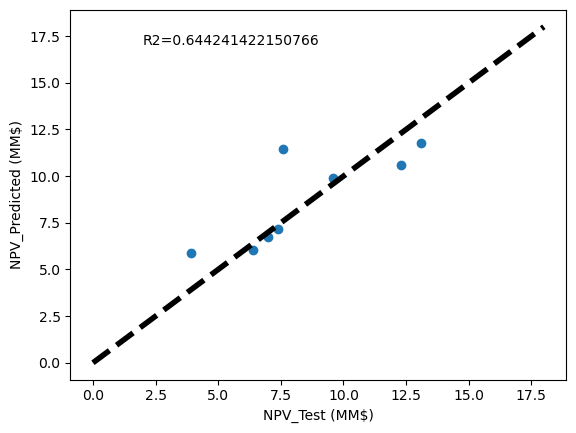

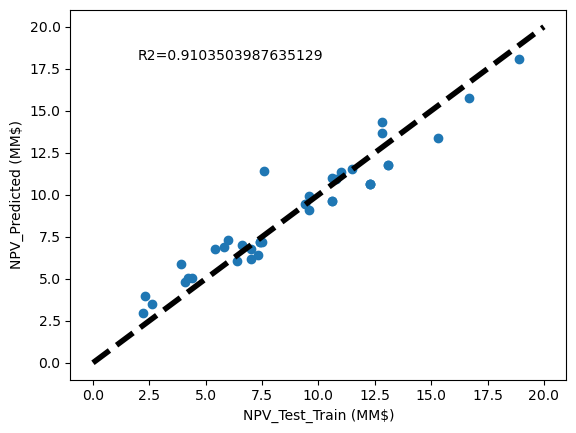

In [16]:
# Making Polynomial MOdel with Lasso parameters for the regression and corss validation with 4 folds
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(3, interaction_only = False),
                      LassoCV(eps = 0.0005, n_alphas = 10, max_iter = 10000, cv = 4))
model.fit(x_train, y_train)

# Predicting the outputs and calcualtiing R2s
y_pred_Test = np.array(model.predict(x_test))
test_scoreTest = model.score(x_test, y_test)
y_Pred_Test_Train = np.array(model.predict(x))
test_scoreTest_Train = model.score(x.values, y)

# Plotting the Outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_Test)
ax.plot([0, 18], [0, 18], 'k--', lw = 4)
ax.set_xlabel('NPV_Test (MM$)'); ax.set_ylabel('NPV_Predicted (MM$)')
plt.text(2, 17, "R2="+str(test_scoreTest).format("%.2f"))
plt.show()

fig,ax = plt.subplots()
ax.scatter(y, y_Pred_Test_Train)
ax.plot([0, 20], [0, 20], 'k--', lw = 4)
ax.set_xlabel('NPV_Test_Train (MM$)'); ax.set_ylabel('NPV_Predicted (MM$)')
plt.text(2, 18, "R2="+str(test_scoreTest_Train).format("%.2f"))
plt.show()

In [ ]:
"Installing library (pyswarm) is required"

from pyswarm import pso
theta = 10E-10
lb = np.array([0.06, 10E-05, 200, 26, 40, 500])
ub = np.array([0.06, 10E-05, 400, 26, 40, 1000])
ub += theta
def f(x):
    return -model.predict(x.reshape(1, -1))
xopt, fopt = pso(f, lb, ub, swarmsize = 200, omega=0.3, phip=5, phig=0.7, maxiter=1000, minstep=1E-08)
print(xopt)
print(fopt)

Stopping search: Swarm best position change less than 1e-08
[6.00000007e-02 1.00000550e-04 4.00000000e+02 2.60000000e+01
 4.00000000e+01 1.00000000e+03]
[-10.70322102]
